In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()
df = df[df['order_book_bids_price'] > 0].reset_index()


2018-03-22 14:53:42,812 root         INFO     Load data from SQL.


In [2]:
df[df.isnull().any(axis=1)]

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num


In [3]:
df.describe()

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
count,223.000000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,23060.000000,1.521720e+09,7070.699686,7075.432735,7073.213498,7072.880987,2.127096,0.095288,1.289005e+06,0.020824,0.017169,7071.952287,7072.488117,2.682921,6.295964,7072.812556,3.259967,5.107623
std,64.518731,3.870477e+03,25.528220,21.555566,23.019679,24.055349,6.691002,0.023945,3.193037e+05,0.023840,0.020520,25.291906,24.056851,3.627582,6.448852,23.935377,6.985787,4.769185
min,22949.000000,1.521713e+09,6922.150000,6975.000000,6940.000000,6940.000000,0.010000,0.010196,7.140920e+05,-0.027765,-0.036283,6939.770000,6940.040000,0.001000,1.000000,6940.050000,0.001062,1.000000
25%,23004.500000,1.521717e+09,7060.500000,7065.040000,7061.990000,7061.990000,0.317823,0.090818,1.013510e+06,-0.005460,0.002353,7063.550000,7061.265000,0.371073,2.000000,7062.050000,0.369971,2.000000
50%,23060.000000,1.521720e+09,7078.890000,7078.900000,7078.900000,7078.900000,0.790000,0.100840,1.358530e+06,0.024976,0.017311,7073.790000,7078.890000,1.439555,4.000000,7078.900000,1.197949,4.000000
75%,23115.500000,1.521723e+09,7080.110000,7085.300000,7082.700000,7081.085000,1.825119,0.113769,1.571218e+06,0.034740,0.033363,7082.920000,7081.090000,3.497612,8.000000,7081.760000,3.138572,6.500000
max,23171.000000,1.521727e+09,7125.830000,7127.160000,7125.840000,7125.840000,90.656802,0.116922,1.710305e+06,0.058285,0.066749,7135.130000,7125.830000,20.496497,49.000000,7125.840000,44.293855,24.000000


In [4]:
df.corr()

,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
index,1.000000,0.999995,-0.114484,-0.154680,-0.110326,-0.146312,0.041787,-0.319592,-0.968024,-0.839553,0.298230,-0.306695,-0.144400,0.010998,-0.066560,-0.151093,-0.021643,0.077793
time,0.999995,1.000000,-0.114529,-0.154896,-0.110528,-0.146358,0.041696,-0.319288,-0.967885,-0.839421,0.297801,-0.306697,-0.144412,0.010982,-0.066330,-0.151106,-0.021772,0.077397
low,-0.114484,-0.114529,1.000000,0.936509,0.947786,0.981748,-0.467839,0.304976,0.148728,0.104367,0.144091,0.939913,0.972099,-0.159581,-0.188852,0.971958,-0.137326,0.264573
high,-0.154680,-0.154896,0.936509,1.000000,0.974410,0.952635,-0.227107,0.251287,0.190358,0.150706,0.126436,0.919552,0.936960,-0.257562,-0.277599,0.938388,-0.221525,0.253886
open,-0.110326,-0.110528,0.947786,0.974410,1.000000,0.924205,-0.233267,0.236275,0.142318,0.107939,0.136726,0.885091,0.911710,-0.210370,-0.233832,0.912402,-0.183713,0.273216
close,-0.146312,-0.146358,0.981748,0.952635,0.924205,1.000000,-0.434187,0.312875,0.183218,0.141370,0.129629,0.961866,0.986839,-0.197653,-0.222378,0.987230,-0.169111,0.243536
volume,0.041787,0.041696,-0.467839,-0.227107,-0.233267,-0.434187,1.000000,-0.253305,-0.047107,-0.008825,-0.036779,-0.398190,-0.430334,-0.047963,-0.009557,-0.432107,-0.039489,-0.095315
tw_sentiment,-0.319592,-0.319288,0.304976,0.251287,0.236275,0.312875,-0.253305,1.000000,0.422802,0.328826,-0.145819,0.424785,0.337415,0.056262,0.102213,0.345290,0.090112,-0.205389
tw_followers,-0.968024,-0.967885,0.148728,0.190358,0.142318,0.183218,-0.047107,0.422802,1.000000,0.834505,-0.350676,0.346243,0.186298,0.011173,0.090715,0.192077,0.065702,-0.061351
reddit_sentiment,-0.839553,-0.839421,0.104367,0.150706,0.107939,0.141370,-0.008825,0.328826,0.834505,1.000000,-0.242047,0.322387,0.136727,0.017100,0.058405,0.145748,0.059300,-0.006842


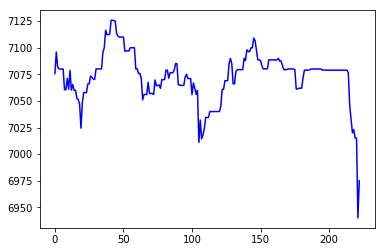

In [5]:
plt.plot(df['close'], 'b')

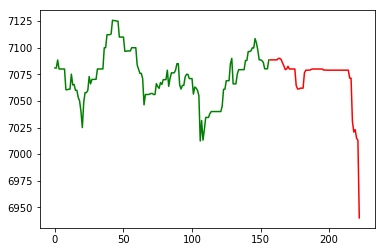

In [6]:
max = df['open'].count()
limit = int(0.3 * max)
plt.plot(df['open'][0:max - limit], 'g')
plt.plot(df['open'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1095e75f8>,
      dtype=object)

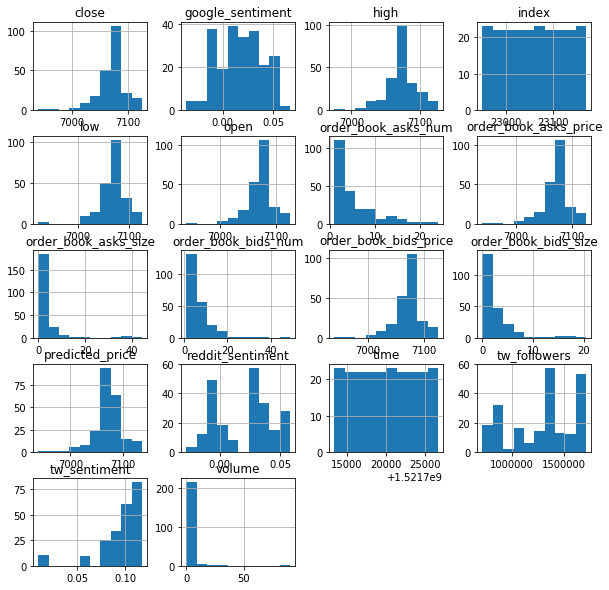

In [7]:
df.hist(figsize=(10,10))

In [8]:
from bitcoin.core import Core
core = Core()
core.train_scaler(df=df)

2018-03-22 14:53:45,785 root         INFO     ENV => test
2018-03-22 14:53:45,787 root         INFO     Train Scaler Model


(MinMaxScaler(copy=True, feature_range=(-1, 1)),
 MinMaxScaler(copy=True, feature_range=(-1, 1)))

In [9]:
from bitcoin.core import Core
core = Core()
history = core.train(df=df)

2018-03-22 14:53:45,864 root         INFO     ENV => test
2018-03-22 14:53:45,868 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            169600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 31/100
156/156 [==============================] - 0s 196us/step - loss: 40.7689 - mean_squared_error: 0.0366 - mean_absolute_error: 0.1476 - val_loss: 38.9577 - val_mean_squared_error: 0.0519 - val_mean_absolute_error: 0.1846
Epoch 32/100
156/156 [==============================] - 0s 189us/step - loss: 38.9130 - mean_squared_error: 0.0328 - mean_absolute_error: 0.1399 - val_loss: 37.1554 - val_mean_squared_error: 0.0469 - val_mean_absolute_error: 0.1695
Epoch 33/100
156/156 [==============================] - 0s 204us/step - loss: 37.1241 - mean_squared_error: 0.0315 - mean_absolute_error: 0.1382 - val_loss: 35.4379 - val_mean_squared_error: 0.0423 - val_mean_absolute_error: 0.1539
Epoch 34/100
156/156 [==============================] - 0s 193us/step - loss: 35.4178 - mean_squared_error: 0.0293 - mean_absolute_error: 0.1338 - val_loss: 33.7791 - val_mean_squared_error: 0.0384 - val_mean_absolute_error: 0.1388
Epoch 35/100
156/156 [==============================] - 0s 198us/step - 

Epoch 67/100
156/156 [==============================] - 0s 187us/step - loss: 6.1047 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0468 - val_loss: 5.7639 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0487
Epoch 68/100
156/156 [==============================] - 0s 194us/step - loss: 5.7670 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0518 - val_loss: 5.4563 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0579
Epoch 69/100
156/156 [==============================] - 0s 186us/step - loss: 5.4482 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0498 - val_loss: 5.1570 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0586
Epoch 70/100
156/156 [==============================] - 0s 201us/step - loss: 5.1461 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0477 - val_loss: 4.8693 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0494
Epoch 71/100
156/156 [==============================] - 0s 208us/step - loss: 4.

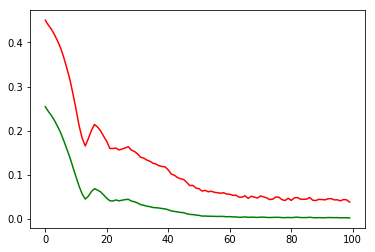

In [10]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [11]:
core.train_anomaly(df=df)

2018-03-22 14:53:57,515 root         INFO     Train Anomaly Model


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:    0.1s finished


KernelDensity(algorithm='auto', atol=0, bandwidth=70.81721124529525,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [12]:
df_predicted = core.test_order_percent(df=df)

2018-03-22 14:54:05,368 root         INFO     Error Order percentage: 53.03%
2018-03-22 14:54:05,370 root         INFO     TEST From 2018-03-22 13:47:00 to 2018-03-22 14:52:00
2018-03-22 14:54:05,371 root         INFO     Number of api calls: 0.47 / min
2018-03-22 14:54:05,372 root         INFO     Number of anomalies: 6
2018-03-22 14:54:05,373 root         INFO     With prediction 996.50 euros => -0.35% => -0.35% / day
2018-03-22 14:54:05,375 root         INFO     Without prediction 979.04 euros => -2.10% => -2.10% / day


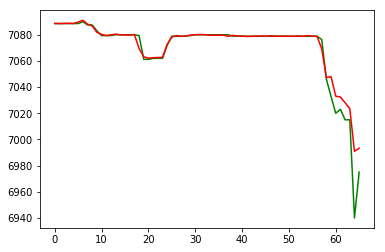

In [26]:
n_test = int(0.3 * df['open'].count())
df_test = df[-n_test:].reset_index()
plt.plot(df_test['close'], 'g')
plt.plot(df_predicted, 'r')